In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#pd.set_option('use_inf_as_na', True)

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

#from matplotlib.colors import ListedColormap
#from sklearn import datasets, metrics, tree 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from subprocess import call
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score, confusion_matrix

import xgboost as xgb

import seaborn as sns

from termcolor import colored



#from sklearn.ensemble import VotingClassifier
#from catboost import CatBoostClassifier
#import xgboost

from matplotlib.colors import ListedColormap
%pylab inline

pd.options.mode.chained_assignment = None  # default='warn'

#from IPython.display import Image
#from subprocess import call

Populating the interactive namespace from numpy and matplotlib


In [2]:
#data = pd.read_csv('/media/marat/Acer/Host/Data/Bees/DataInit/data_mer.csv', decimal=',', sep = '\t', encoding='latin-1', parse_dates = ['Date_test'], dayfirst=True)
data = pd.read_csv('E:/Host/Data/Bees/DataInit/data_mer.csv', decimal=',', sep = '\t', encoding='latin-1', parse_dates = ['Date_test'], dayfirst=True)
#data = pd.read_csv('/media/marat/Acer/Host/Data/Bees/DataInit/data_mer.csv', decimal=',', sep = '\t', encoding='latin-1', parse_dates = ['Date_test'], dayfirst=True)
data_f = pd.read_csv('E:/Host/Data/Bees/DataInit/data_mer.csv', decimal=',', sep = '\t', encoding='latin-1', parse_dates = ['Date_test'], dayfirst=True)
data_f.columns = data_f.columns.str.replace("/", "del")
data_f.columns = data_f.columns.str.replace(',','_')
data_f.columns = data_f.columns.str.replace(')','')
data_f.columns = data_f.columns.str.replace('(','')

data.columns   = data.columns.str.replace("/", "del")
data.columns = data.columns.str.replace(',','_')
data.columns = data.columns.str.replace(')','')
data.columns = data.columns.str.replace('(','')


In [3]:
def dbl_n(na):
    matr = pd.DataFrame(data_f[  
           (data_f[data_f_analiz_year_pivot.index[na][1]] >= data_f_analiz_year_pivot['f_min'][na])
         & (data_f[data_f_analiz_year_pivot.index[na][1]] <= data_f_analiz_year_pivot['f_max'][na])
         #second feature   
         & (data_f[data_f_analiz_year_pivot.index[na][2]] >= data_f_analiz_year_pivot['1f_min'][na])
         & (data_f[data_f_analiz_year_pivot.index[na][2]] <= data_f_analiz_year_pivot['1f_max'][na])])

    matr_dbl = pd.pivot_table(matr,
             index=['Date_test'],
                 values = ['res_profit', 'Year'],
                 aggfunc=['mean', 'count']                        
            
            )
    matr_dbl.columns = ['Year', 'Profit', 'dsfd', 'sdf']
    matr_dbl_year = pd.pivot_table(matr_dbl,
             index=['Year'],
                 values = ['Profit'],
                 aggfunc=['mean', 'count'],
                                   margins=True)
            
    matr_dbl_year.columns = ['Profit%', 'count']        
    return(matr_dbl_year)         

#STOCK
def dbl_s(na):
    matr_dbl_all = pd.DataFrame()    
    for na in na:
        matr = pd.DataFrame(data_f[  
               (data_f[data_f_analiz_year_pivot.index[na][1]] >= data_f_analiz_year_pivot['f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][1]] <= data_f_analiz_year_pivot['f_max'][na])
             #second feature   
             & (data_f[data_f_analiz_year_pivot.index[na][2]] >= data_f_analiz_year_pivot['1f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][2]] <= data_f_analiz_year_pivot['1f_max'][na])])

        matr_dbl = pd.pivot_table(matr,
                 index=['Symbol'],
                     values = 'res_profit',
                     aggfunc=['mean', 'count'],
                                  margins=True


                )
        matr_dbl.columns = ['Profit%', 'count']
        matr_dbl = matr_dbl.sort_values(by = 'count', ascending=False)
        
        matr_dbl_all = pd.concat([matr_dbl_all, matr_dbl], axis=1)
        #
        return(matr_dbl_all)
    
def dbl_b(na):
    
    blu = ['SBERP', 'SBER', 'GAZP', 'LKOH', 'ROSN', 'VTBR', 'SNGS', 'GMKN', 'SNGSP']
    matr = pd.DataFrame(data_f[  
               (data_f[data_f_analiz_year_pivot.index[na][1]] >= data_f_analiz_year_pivot['f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][1]] <= data_f_analiz_year_pivot['f_max'][na])
             #second feature   
             & (data_f[data_f_analiz_year_pivot.index[na][2]] >= data_f_analiz_year_pivot['1f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][2]] <= data_f_analiz_year_pivot['1f_max'][na])])

    matr = matr[matr['Symbol'].isin(blu)]
    matr_dbl = pd.pivot_table(matr,
                 index=['Date_test'],
                     values = ['res_profit', 'Year'],
                     aggfunc=['mean', 'count']                        

                )
    matr_dbl.columns = ['Profit',  'Year', 'dsfd', 'sdf']
    matr_dbl_year = pd.pivot_table(matr_dbl,
                 index=['Year'],
                     values = ['Profit'],
                     aggfunc=['mean', 'count'],
                                       margins=True)
    matr_dbl_year.columns = ['Profit%', 'count']   
    return(matr_dbl_year)

def blu(na):

    blu = ['SBERP', 'SBER', 'GAZP', 'LKOH', 'ROSN', 'VTBR', 'SNGS', 'GMKN', 'SNGSP']
    matr = pd.DataFrame(data_f[  
               (data_f[data_f_analiz_year_pivot.index[na][1]] >= data_f_analiz_year_pivot['f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][1]] <= data_f_analiz_year_pivot['f_max'][na])
             #second feature   
             & (data_f[data_f_analiz_year_pivot.index[na][2]] >= data_f_analiz_year_pivot['1f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][2]] <= data_f_analiz_year_pivot['1f_max'][na])])

    matr = matr[matr['Symbol'].isin(blu)]
    matr_dbl = pd.pivot_table(matr,
                 index=['Year'],
                     values = ['res_profit'],
                     aggfunc=['mean', 'count'],
                              margins=True

                )
    matr_dbl
    return(matr_dbl) 


def year(na):

    matr = pd.DataFrame(data_f[  
               (data_f[data_f_analiz_year_pivot.index[na][1]] >= data_f_analiz_year_pivot['f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][1]] <= data_f_analiz_year_pivot['f_max'][na])
             #second feature   
             & (data_f[data_f_analiz_year_pivot.index[na][2]] >= data_f_analiz_year_pivot['1f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][2]] <= data_f_analiz_year_pivot['1f_max'][na])])


    matr_dbl = pd.pivot_table(matr,
                 index=['Year'],
                     values = ['res_profit'],
                     aggfunc=['mean', 'count'],
                              margins=True

                )
    matr_dbl
    return(matr_dbl) 

def merg():    


    matr_all = pd.DataFrame()
    piv_matr_all_all = pd.DataFrame()
    for merg in np.arange(len(bb)):

        matr = pd.DataFrame(data_f[  
               (data_f[bb.index[merg][1]] >= bb['f_min'][merg])
             & (data_f[bb.index[merg][1]] <= bb['f_max'][merg])
             #second feature   
             & (data_f[bb.index[merg][2]] >= bb['1f_min'][merg])
             & (data_f[bb.index[merg][2]] <= bb['1f_max'][merg])
            ])

        matr = matr.assign(namber = bb['namber'][merg])
        matr_all = matr_all.append(matr)

        piv_matr_1 = pd.pivot_table(matr[matr['namber']==bb['namber'][merg]], 
                                       index='Date_test',
                                        values=['res_profit', 'Year'],
                                          aggfunc={'res_profit':['mean', "count"], 'Year':['mean']}

                                       )

        piv_matr_1.columns = ['Year', 'count', 'profit']
        piv_matr_1 = pd.pivot_table(piv_matr_1, 
                                       index='Year',
                                        values=['profit'],
                                          aggfunc=['mean', "count"],
                                          margins=True
                                       )
        piv_matr_1.columns = ['profit'+str(bb['namber'][merg]), 'count'+str(bb['namber'][merg])]
        piv_matr_all_all = pd.concat([piv_matr_all_all, piv_matr_1], axis=1)
        
    piv_matr_all = pd.pivot_table(matr_all, 
                               index='Date_test',
                                values=['res_profit', 'Year'],
                                  aggfunc={'res_profit':['mean', "count"], 'Year':['mean']}

                               )
    piv_matr_all.columns = ['Year', 'count', 'profit']
    piv_matr_all = pd.pivot_table(piv_matr_all, 
                               index='Year',
                                values=['profit'],
                                  aggfunc=['mean', "count"],
                                  margins=True

                               )

    piv_matr_all.columns = ['profit', 'count']    
    piv_matr_all_all = pd.concat([piv_matr_all, piv_matr_all_all], axis=1)



    return(piv_matr_all_all)  

def dbldddd_n(na):

    matr = pd.DataFrame(data_f[  
               (data_f[aa.index[aa['namber']==na][0][1]] >= aa[aa['namber']==na]['f_min'][0])
             & (data_f[aa.index[aa['namber']==na][0][1]] <= aa[aa['namber']==na]['f_max'][0])
             #second feature   
             & (data_f[aa.index[aa['namber']==na][0][2]] >= aa[aa['namber']==na]['1f_min'][0])
             & (data_f[aa.index[aa['namber']==na][0][2]] <= aa[aa['namber']==na]['1f_max'][0])
    ])

    matr_dbl = pd.pivot_table(matr,
                 index=['Date_test'],
                     values = ['res_profit', 'Year'],
                     aggfunc=['mean', 'count']                        

                )
    matr_dbl.columns = ['Year', 'Profit', 'dsfd', 'sdf']
    matr_dbl_year = pd.pivot_table(matr_dbl,
                 index=['Year'],
                     values = ['Profit'],
                     aggfunc=['mean', 'count'],
                                       margins=True)

    matr_dbl_year.columns = ['Profit%', 'count']        
    return(matr_dbl_year)         


In [29]:
data_f = data_f[[
    'Date_test',
'Profit %_1030',
 
 'Year',
 
 'GEP',
 'Min10',
 'CldelHigh',
 'CldelLow',
 'Cldelw_High',
 'Cldelw_Low',
 'CldelmHigh',
 'CldelmLow',
 'wdif',
 'dif',
 'Vol20delVol200',
 'tHigh%',
 'tLow%',
 'tHighClose%',
 'tLowClose%',
 'tHigh%-tLow%',
 'CldelSMA21',
 'CldelSMA5',
 'SMA5-SMA21',
 'CldelminSMA',
 'CldelmaxSMA',
 
 'WilliamsR30',
 'Volatility24_12',
 'VHFClose_24',
 'TRIXClose_10',
 'StochRSIClose_14',
 'StochD14_ 5',
 'StochK14',
 'StdDevClose_14_Population',
 'RVI20',
 'RSquaredClose_ 30',
 'RSIClose_20',
 'ROCClose_30',
 'QStick24',
 'MomentumPctClose_14',
 'MomentumClose_14',
 'MFI20',
 'MACDClose',
 'LinearRegSlopeClose_20',
 'KSTClose_10_10_15_10_20_10_30_15',
 'HVClose_20_252',
 'EMV14',
 'EMMinusClose_40',
 'EMPlusClose_40',
 'DSS10_ 20_ 5',
 'DPOClose20',
 'CumDownClose_4',
 'CumUpClose_4',
 'CMOClose_20',
 'CMF21',
 'CCI20',
 'ATRP14',
 'ATR14',
 'AroonDownClose_20',
 'AroonUpClose_20',
 'ADX14',
 'ADXR14',
 'DIMinus14',
 'DIPlus14',
 'DX20',
 ]]

In [28]:
list(data_f)

['Unnamed: 0',
 'Close_Test',
 'Close_test',
 'Volume',
 'Open',
 'High',
 'Low',
 'Date',
 'Number',
 'Symbol',
 'Entry Date',
 'Date_test',
 'Entry Price',
 'Exit Date',
 'Exit Price',
 'Profit %_1845',
 'Profit %_1030',
 'Profit %_1245',
 'Profit %_1845+-',
 'MAEdelMFE_1845',
 'Profit %_stop',
 'Profit %_stop+-',
 'Profit %_1030+-',
 'Profit %_1245+-',
 'Pr_SEGE',
 'Pr_SEGE+-',
 'MAE %',
 'MFE %',
 'dSMA21',
 'dSMA5',
 'Vol20',
 'Vil200',
 'tHigh',
 'tLow',
 'tHighClose',
 'tLowClose',
 'Year',
 'YearMonth',
 'NumMonth',
 'GEP_inside',
 'Week',
 'GEP',
 'Min10',
 'CldelHigh',
 'CldelLow',
 'Cldelw_High',
 'Cldelw_Low',
 'CldelmHigh',
 'CldelmLow',
 'wdif',
 'dif',
 'Vol20delVol200',
 'tHigh%',
 'tLow%',
 'tHighClose%',
 'tLowClose%',
 'tHigh%-tLow%',
 'CldelSMA21',
 'CldelSMA5',
 'SMA5-SMA21',
 'CldelminSMA',
 'CldelmaxSMA',
 'l_Min10',
 's_Min10',
 'l_gep',
 's_gep',
 'l_cldelhigh',
 's_cldelhigh',
 'l_cldellow',
 's_cldellow',
 'l_wdif',
 's_wdif',
 'l_SMA5-SMA21',
 'S_SMA5-SMA21'

In [3]:
%%time
data_f_analiz_year = pd.read_csv('data_f_analiz_year.txt', 
  usecols=["profit", 'feature_f', 'namber','n_est','deep__', 'Data', 'data_year', 'proba2_range', ], 
  dtype={"profit":'float16', 'namber':'float16','proba2_range':'float16','n_est':'int8','deep__':'int8','data_year':'int16'},
#  nrows=5000000
                                    )
#data_f_analiz_year

Wall time: 1min 28s


In [30]:
all__1 = ['GEP',
 'Min10',
 'CldelHigh',
 'CldelLow',
 'Cldelw_High',
 'Cldelw_Low',
 'CldelmHigh',
 'CldelmLow',
 'wdif',
 'dif',
 'Vol20delVol200',
 'tHigh%',
 'tLow%',
 'tHighClose%',
 'tLowClose%',
 'tHigh%-tLow%',
 'CldelSMA21',
 'CldelSMA5',
 'SMA5-SMA21',
 'CldelminSMA',
 'CldelmaxSMA',

 ]

In [31]:
all__2 = ['GEP',
 'Min10',
 'CldelHigh',
 'CldelLow',
 'Cldelw_High',
 'Cldelw_Low',
 'CldelmHigh',
 'CldelmLow',
 'wdif',
 'dif',
 'Vol20delVol200',
 'tHigh%',
 'tLow%',
 'tHighClose%',
 'tLowClose%',
 'tHigh%-tLow%',
 'CldelSMA21',
 'CldelSMA5',
 'SMA5-SMA21',
 'CldelminSMA',
 'CldelmaxSMA',
         ]

In [5]:
all__2 = ['Min10']

In [6]:
all__1 = [ 'wdif',
 'dif','Min10']

In [76]:
list(data_f)

['Unnamed: 0',
 'Close_Test',
 'Close_test',
 'Volume',
 'Open',
 'High',
 'Low',
 'Date',
 'Number',
 'Symbol',
 'Entry Date',
 'Date_test',
 'Entry Price',
 'Exit Date',
 'Exit Price',
 'Profit %_1845',
 'Profit %_1030',
 'Profit %_1245',
 'Profit %_1845+-',
 'MAEdelMFE_1845',
 'Profit %_stop',
 'Profit %_stop+-',
 'Profit %_1030+-',
 'Profit %_1245+-',
 'Pr_SEGE',
 'Pr_SEGE+-',
 'MAE %',
 'MFE %',
 'dSMA21',
 'dSMA5',
 'Vol20',
 'Vil200',
 'tHigh',
 'tLow',
 'tHighClose',
 'tLowClose',
 'Year',
 'YearMonth',
 'NumMonth',
 'GEP_inside',
 'Week',
 'GEP',
 'Min10',
 'CldelHigh',
 'CldelLow',
 'Cldelw_High',
 'Cldelw_Low',
 'CldelmHigh',
 'CldelmLow',
 'wdif',
 'dif',
 'Vol20delVol200',
 'tHigh%',
 'tLow%',
 'tHighClose%',
 'tLowClose%',
 'tHigh%-tLow%',
 'CldelSMA21',
 'CldelSMA5',
 'SMA5-SMA21',
 'CldelminSMA',
 'CldelmaxSMA',
 'l_Min10',
 's_Min10',
 'l_gep',
 's_gep',
 'l_cldelhigh',
 's_cldelhigh',
 'l_cldellow',
 's_cldellow',
 'l_wdif',
 's_wdif',
 'l_SMA5-SMA21',
 'S_SMA5-SMA21'

In [ ]:
        #рисуем     
                feature_f = str(item_fi) + '-' + str(item_se)
                for item_gr in list(range(n_est)):
                    export_graphviz(model_f.estimators_[item_gr], 
                        out_file='E:/Host/Data/Bees/Graf/Dot/' + str(feature_f) + 'tree.dot', 
                            feature_names = X_data_f_train.columns,
                          #  class_names = (target_names),
                          #  class_names = list(target.columns.values),
                            rounded = True, proportion = False, 
                          #  feature_names = True,
                            precision = 2, filled = True)

                    call(['dot', '-Tpng', 
                              'E:/Host/Data/Bees/Graf/Dot/' + str(feature_f)  + 'tree.dot', 
                          '-o', 
                              'E:/Host/Data/Bees/Graf/Dot/' + str(feature_f)  +'tree.png', 
                          '-Gdpi=150'], shell=True)




        #рисуем

In [13]:
data_f

,Unnamed: 0,Close_Test,Close_test,Volume,Open,High,Low,Date,Number,Symbol,...,AroonDownClose_20,AroonUpClose_20,ADX14,ADXR14,DIMinus14,DIPlus14,DX20,Month,res_profit,res_profit_PM
0,0,125.500000,125.500000,333170,125.790001,126.180000,124.720001,31.12.2009,1,URKA,...,75,5,27.980367,19.687985,29,11,32,1,-1.32,0
1,1,69.000000,69.000000,6430165,68.730003,69.529999,68.449997,31.12.2009,2,SBERP,...,15,60,36.205503,34.592859,23,32,22,1,-2.47,0
2,2,82.940002,82.940002,18625522,82.059998,83.800003,81.889999,31.12.2009,3,SBER,...,15,100,27.971986,20.454163,13,31,33,1,-1.35,0
3,3,148.529999,148.529999,264364,148.389999,149.880005,143.699997,31.12.2009,4,RTKM,...,70,5,35.128879,31.573526,32,10,35,1,1.15,1
4,4,163.729996,163.729996,44949,163.529999,163.990005,162.800003,31.12.2009,5,SIBN,...,0,45,12.571313,15.937069,20,19,5,1,0.88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49298,49454,4700.000000,4700.000000,148165,4736.000000,4736.000000,4651.000000,03.04.2018,49299,MGNT,...,80,20,24.570701,23.915606,26,16,24,4,0.62,1
49299,49455,10830.000000,10830.000000,119329,10810.000000,10874.000000,10718.000000,03.04.2018,49300,GMKN,...,80,0,20.121539,17.816362,24,18,12,4,0.36,1
49300,49456,89.570000,89.570000,5489700,90.099998,90.599998,88.750000,03.04.2018,49301,ALRS,...,0,55,26.777177,31.100895,27,20,2,4,0.88,1
49301,49457,604.950012,604.950012,981760,599.549988,604.950012,597.650024,03.04.2018,49302,TATN,...,10,50,21.248547,25.453421,21,20,5,4,0.72,1


In [32]:
%%time

data_f['res_profit'] = data_f['Profit %_1030']
data_f['res_profit_PM'] = np.where(data_f['res_profit']>0,1,0)

column = 'Year'
#n_est = 1

# for анализ фичей ДВЕ ДВЕ ДВЕ ДВЕ

data_f.dropna(0, inplace=True)
data_f_with2010 = pd.DataFrame()
data_f_analiz_year = pd.DataFrame()
data_f_analiz_2010 = pd.DataFrame()

for deep__ in [2]:    
#    for item_year in [2010, 2011,2012,2013,2014,2015,2016,2017,2018]:
#    for item_year in [2010]:
    for n_est in [5]:
        for item_fi in all__1:
            for item_se in all__2:

                data_f_with2010 = data_f[data_f[column] >= 2010]

                X_data_f_train = data_f_with2010[[item_fi, item_se]]
                y_data_f_train = data_f_with2010['res_profit_PM']


           #     model_f = RandomForestClassifier(n_estimators=n_est, n_jobs=-1, max_depth=deep__, random_state=1)
                model_f = GradientBoostingClassifier(n_estimators=n_est, max_depth=deep__, random_state=1, learning_rate=0.1)
                model_f.fit(X_data_f_train, y_data_f_train)
                pred_f = model_f.predict_proba(X_data_f_train)
                fe_imp  = model_f.feature_importances_
              

                data_f_analiz_2010 = data_f_analiz_2010.assign(profit = 
                    data_f_with2010['res_profit'], 
                            feature_f = str(item_fi) + '-' + str(item_se), 
                            feature1 = str(item_fi),   
                            feature2 = str(item_se), 
                            namber   = data_f_with2010[item_fi],
                            namber1  = data_f_with2010[item_se],
                            n_est   = n_est,
                            deep__  = deep__,                                   
                            proba1  = pred_f[:, 0], 
                            proba2  = pred_f[:, 1],
                            Data    = data_f_with2010['Date_test'],
                            fe_imp1  = fe_imp[0],
                            fe_imp2  = fe_imp[1]
                                                              )

                data_f_analiz_year = data_f_analiz_year.append(data_f_analiz_2010)
                data_f_analiz_2010 = pd.DataFrame()

            #рисуем


            #рисуем

           # print(deep__)
           # print(n_est)
           # print(item_fe)
            
data_f_analiz_year['data_year'] = data_f[column]

data_f_analiz_year['proba2_range'] = \
np.where(data_f_analiz_year['proba2']>0.55, 0.55,         
np.where(data_f_analiz_year['proba2']>0.54, 0.54, 
np.where(data_f_analiz_year['proba2']>0.53, 0.53,
np.where(data_f_analiz_year['proba2']>0.52, 0.52, 
np.where(data_f_analiz_year['proba2']>0.51, 0.51, 
np.where(data_f_analiz_year['proba2']>0.50, 0.50, 0.49))))))        

data_f_analiz_year


Wall time: 13min 9s


,profit,feature_f,feature1,feature2,namber,namber1,n_est,deep__,proba1,proba2,Data,fe_imp1,fe_imp2,data_year,proba2_range
0,-1.32,GEP-GEP,GEP,GEP,12.876,12.876,5,2,0.478,0.522,2010-01-11,0.497,0.503,2010,0.52
1,-2.47,GEP-GEP,GEP,GEP,5.580,5.580,5,2,0.478,0.522,2010-01-11,0.497,0.503,2010,0.52
2,-1.35,GEP-GEP,GEP,GEP,4.895,4.895,5,2,0.478,0.522,2010-01-11,0.497,0.503,2010,0.52
3,1.15,GEP-GEP,GEP,GEP,-0.350,-0.350,5,2,0.482,0.518,2010-01-11,0.497,0.503,2010,0.51
4,0.88,GEP-GEP,GEP,GEP,2.400,2.400,5,2,0.484,0.516,2010-01-11,0.497,0.503,2010,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49298,0.62,CldelmaxSMA-CldelmaxSMA,CldelmaxSMA,CldelmaxSMA,-4.741,-4.741,5,2,0.481,0.519,2018-04-04,0.408,0.592,2018,0.51
49299,0.36,CldelmaxSMA-CldelmaxSMA,CldelmaxSMA,CldelmaxSMA,-1.850,-1.850,5,2,0.481,0.519,2018-04-04,0.408,0.592,2018,0.51
49300,0.88,CldelmaxSMA-CldelmaxSMA,CldelmaxSMA,CldelmaxSMA,-1.890,-1.890,5,2,0.481,0.519,2018-04-04,0.408,0.592,2018,0.51
49301,0.72,CldelmaxSMA-CldelmaxSMA,CldelmaxSMA,CldelmaxSMA,-1.239,-1.239,5,2,0.481,0.519,2018-04-04,0.408,0.592,2018,0.51


In [82]:
#КАЧАЕМ В ФАЙЛ
data_f_analiz_year.to_csv('2feat_data_f_analiz_year_est10_1507.csv')

In [10]:
%%time

#ГРУЗИМ ИЗ ФАЙЛА
data_f_analiz_year = pd.read_csv('2feat_data_f_analiz_year_est10_1507.csv', 
  usecols=["profit", 'feature_f', 'feature1', 'feature2', 'namber', 'namber1', 'n_est','deep__', 'Data', 'fe_imp1', 'fe_imp2', 'data_year', 'proba2_range', ], 
#  dtype={"profit":'float16', 'namber':'float32', 'namber1':'float64', 'proba2_range':'float64','n_est':'int8','deep__':'int8','data_year':'int16', 'fe_imp1':'float16', 'fe_imp2':'float16'},
#  nrows=5000000
                                    )
#data_f_analiz_year

Wall time: 1min


In [6]:
%%time


# АНАЛИЗ ФИЧЕЙ СВЕРКА ЧЕРЕЗ DATA_F + дубликаты

matr_all   = pd.DataFrame()
matr_all1  = pd.DataFrame()
matr_all2  = pd.DataFrame()
matr_all_d = pd.DataFrame()
matr_glo   = pd.DataFrame()

pd.options.display.precision = 3
data_f_analiz_year_pivot = pd.pivot_table(data_f_analiz_year[data_f_analiz_year['proba2_range'] >= 0.055], 
    index = ['feature_f', 'feature1', 'feature2','deep__', 'n_est',  'proba2_range'], 
    values=['namber', 'namber1', 'profit', 'fe_imp1','fe_imp2',], 
    aggfunc = {'profit': ['mean', 'count'], 'namber':['mean', 'max', 'min'], 'namber1':['mean', 'max', 'min'], 'fe_imp1':['mean'], 'fe_imp2':['mean']})
data_f_analiz_year_pivot.columns = ['fe_imp1', 'fe_imp2', 'f_max', 'f_mean', 'f_min', '1f_max', '1f_mean', '1f_min', 'profit_c', 'profit_%']

data_f_analiz_year_pivot
data_f_analiz_year_pivot = data_f_analiz_year_pivot[data_f_analiz_year_pivot['profit_c'] != 1] #УБИРАЕМ 1 СДЕЛКУ

for na in np.arange(len(data_f_analiz_year_pivot.index)):
    matr = pd.DataFrame(data_f[  
           (data_f[data_f_analiz_year_pivot.index[na][1]] >= data_f_analiz_year_pivot['f_min'][na])
         & (data_f[data_f_analiz_year_pivot.index[na][1]] <= data_f_analiz_year_pivot['f_max'][na])
         #second feature   
         & (data_f[data_f_analiz_year_pivot.index[na][2]] >= data_f_analiz_year_pivot['1f_min'][na])
         & (data_f[data_f_analiz_year_pivot.index[na][2]] <= data_f_analiz_year_pivot['1f_max'][na])])
    
    matr1 = pd.DataFrame(data_f[  
           (data_f[data_f_analiz_year_pivot.index[na][1]] >= data_f_analiz_year_pivot['f_min'][na])
         & (data_f[data_f_analiz_year_pivot.index[na][1]] <= data_f_analiz_year_pivot['f_max'][na])
         #second feature   
       #  & (data_f[data_f_analiz_year_pivot.index[na][2]] >= data_f_analiz_year_pivot['1f_min'][na])
       #  & (data_f[data_f_analiz_year_pivot.index[na][2]] <= data_f_analiz_year_pivot['1f_max'][na])
    ])
        
    matr2 = pd.DataFrame(data_f[  
      #     (data_f[data_f_analiz_year_pivot.index[na][1]] >= data_f_analiz_year_pivot['f_min'][na])
      #   & (data_f[data_f_analiz_year_pivot.index[na][1]] <= data_f_analiz_year_pivot['f_max'][na])
         #second feature   
           (data_f[data_f_analiz_year_pivot.index[na][2]] >= data_f_analiz_year_pivot['1f_min'][na])
         & (data_f[data_f_analiz_year_pivot.index[na][2]] <= data_f_analiz_year_pivot['1f_max'][na])])

    matr_dbl = pd.pivot_table(matr,
             index=['Date_test'],
                 values = 'res_profit',
                 aggfunc=['mean', 'count']                        
            
            )
    matr_dbl.columns = ['Profit%', 'count'] 
    matr_dbl_result  = matr_dbl['Profit%'].agg(['mean', 'count']).T #без дубликатов и ТУТ МОЖНО ДРУГИЕ ПРОФИТЫ ВОТКНУТЬ
    
    matr   = matr['res_profit'].agg(['mean', 'count']).T # дубликаты и ТУТ МОЖНО ДРУГИЕ ПРОФИТЫ ВОТКНУТЬ
    matr1 = matr1['res_profit'].agg(['mean', 'count']).T # 1 фича дубликаты и ТУТ МОЖНО ДРУГИЕ ПРОФИТЫ ВОТКНУТЬ
    matr2 = matr2['res_profit'].agg(['mean', 'count']).T # 2 фича дубликаты и ТУТ МОЖНО ДРУГИЕ ПРОФИТЫ ВОТКНУТЬ
    
    matr_all  = matr_all.append(matr)
    matr_all_d = matr_all_d.append(matr_dbl_result)
    matr_all1 = matr_all1.append(matr1)
    matr_all2 = matr_all2.append(matr2)

#    print(na)
matr_all.index    = data_f_analiz_year_pivot.index
matr_all1.index   = data_f_analiz_year_pivot.index
matr_all2.index   = data_f_analiz_year_pivot.index
matr_all_d.index  = data_f_analiz_year_pivot.index

dddd = pd.concat([data_f_analiz_year_pivot, matr_all, ],  axis = 1)
dddd = pd.concat([dddd, matr_all_d],                      axis = 1)
dddd = pd.concat([dddd, matr_all1, ], axis = 1)
dddd = pd.concat([dddd, matr_all2, ], axis = 1)

dddd.columns = ['fe_imp1','fe_imp2','f_max','f_mean','f_min','1f_max','1f_mean','1f_min','profit_c','profit_%','c_alF','%_alF','co_-d','me_-d', 'c_1F','%_1F', 'c_2F','%_2F']

#dddd.drop_duplicates(['profit_c', 'profit_%', 'count', 'mean', 'count_d', 'mean_d'])
dddd['namber'] = np.arange(len(dddd))
dddd.style.set_properties(subset = ['c_alF','%_alF'], color='green').set_properties(subset = ['c_1F', '%_1F'],  
                                                                                  color='blue').set_properties(subset = ['c_2F', '%_2F'],  color='orange')     


NameError: name 'data_f_analiz_year' is not defined

In [35]:
dddd.to_csv('dddd1607.csv')

In [5]:
dddd = pd.read_csv('dddd1607.csv', index_col=['feature_f','feature1','feature2','deep__','n_est','proba2_range'])
dddd

fe_imp1  \
feature_f           feature1  feature2  deep__ n_est proba2_range             
CldelHigh-CldelHigh CldelHigh CldelHigh 2      5     0.49          0.426097   
                                                     0.51          0.426097   
                                                     0.54          0.426097   
                                                     0.55          0.426097   
CldelHigh-CldelLow  CldelHigh CldelLow  2      5     0.49          0.908901   
...                                                                     ...   
wdif-wdif           wdif      wdif      2      5     0.49          0.357662   
                                                     0.50          0.357662   
                                                     0.51          0.357662   
                                                     0.52          0.357662   
                                                     0.54          0.357662   

                                                                    fe_imp2  \
feature_f           feature1  feature2  deep__ n_est proba2_range             
CldelHigh-CldelHigh CldelHigh CldelHigh 2      5     0.49          0.573903   
                                                     0.51          0.573903   
                                                     0.54          0.573903   
                                                     0.55          0.573903   
CldelHigh-CldelLow  CldelHigh CldelLow  2      5     0.49          0.091099   
...                                                                     ...   
wdif-wdif           wdif      wdif      2      5     0.49          0.642338   
                                                     0.50          0.642338   
                                                     0.51          0.642338   
                                                     0.52          0.642338   
                                                     0.54          0.642338   

                                                                        f_max  \
feature_f           feature1  feature2  deep__ n_est proba2_range               
CldelHigh-CldelHigh CldelHigh CldelHigh 2      5     0.49            1.371566   
                                                     0.51            1.363640   
                                                     0.54            3.263859   
                                                     0.55           53.043482   
CldelHigh-CldelLow  CldelHigh CldelLow  2      5     0.49            1.371566   
...                                                                       ...   
wdif-wdif           wdif      wdif      2      5     0.49           13.643927   
                                                     0.50          171.868308   
                                                     0.51           13.433778   
                                                     0.52           13.641315   
                                                     0.54           13.600588   

                                                                      f_mean  \
feature_f           feature1  feature2  deep__ n_est proba2_range              
CldelHigh-CldelHigh CldelHigh CldelHigh 2      5     0.49           1.368092   
                                                     0.51          -1.605715   
                                                     0.54           2.007404   
                                                     0.55           5.106893   
CldelHigh-CldelLow  CldelHigh CldelLow  2      5     0.49           1.368092   
...                                                                      ...   
wdif-wdif           wdif      wdif      2      5     0.49          13.617512   
                                                     0.50          20.306167   
                                                     0.51          -2.400206   
                                                     0.52          -3.900511  

In [6]:
%%time

pd.options.display.max_rows=2000
# ВЫВОД ЛУЧШИХ
aa = pd.DataFrame(dddd[
      (dddd['me_-d']       > 0.9)
  &   (dddd['co_-d']       > 100)
#  &   (dddd['co_-d']       < 100)
  &   (dddd['%_alF']       > 1.5*dddd['%_1F'])
  &   (dddd['%_alF']       > 1.5*dddd['%_2F'])
#  &   (dddd.index.get_level_values(2)  == 'tLow%')

])
aa = aa.drop_duplicates(['%_alF', 'c_alF'])
aa['sort'] = aa['%_1F'] - aa['%_2F']
aa = aa.sort_values(by='c_alF', ascending=False)
aa.style.set_properties(subset = ['c_alF','%_alF'], color='green').set_properties(subset = ['c_1F', '%_1F'],  
                                                                                  color='blue').set_properties(subset = ['c_2F', '%_2F'],  color='orange') 

Wall time: 54 ms


,,,,,,fe_imp1,fe_imp2,f_max,f_mean,f_min,1f_max,1f_mean,1f_min,profit_c,profit_%,c_alF,%_alF,co_-d,me_-d,c_1F,%_1F,c_2F,%_2F,namber,sort
feature_f,feature1,feature2,deep__,n_est,proba2_range,,,,,,,,,,,,,,,,,,,,
CldelLow-CldelmLow,CldelLow,CldelmLow,2,5,0.55,0.473914,0.526086,46.258505,9.430094,5.178569,-11.423414,-19.918794,-64.163889,216,2.321713,216.000000,2.321713,81.000000,1.590950,2960.000000,0.558757,1055.000000,0.507498,148,0.051259
CldelLow-Cldelw_High,CldelLow,Cldelw_High,2,5,0.55,0.740441,0.259559,55.117697,10.688079,5.209513,-14.629859,-22.260480,-52.722065,204,2.336667,204.000000,2.336667,93.000000,1.871067,2920.000000,0.546661,975.000000,0.205262,165,0.341399
CldelmLow-CldelminSMA,CldelmLow,CldelminSMA,2,5,0.55,0.788398,0.211602,-11.554579,-17.563270,-42.600511,25.437575,3.414952,0.464578,197,1.001726,197.000000,1.001726,72.000000,1.233677,1027.000000,0.550312,29404.000000,0.095509,604,0.454802
CldelLow-CldelSMA5,CldelLow,CldelSMA5,2,5,0.55,0.554910,0.445090,30.200615,9.788301,5.215686,-5.021457,-10.127613,-36.418108,158,2.189051,158.000000,2.189051,70.000000,2.545438,2894.000000,0.533307,1773.000000,0.040034,136,0.493273
CldelLow-CldelminSMA,CldelLow,CldelminSMA,2,5,0.55,0.510637,0.489363,30.200615,9.840009,5.215686,-5.107140,-10.389712,-36.418108,145,2.292552,145.000000,2.292552,60.000000,2.693728,2894.000000,0.533307,1414.000000,-0.003784,159,0.537090
CldelmLow-tHighClose%,CldelmLow,tHighClose%,2,5,0.55,0.530890,0.469110,-10.413028,-16.539981,-42.600511,0.055600,0.003929,-0.029800,128,1.462422,128.000000,1.462422,75.000000,1.610159,1228.000000,0.446221,8286.000000,0.203069,663,0.243152
CldelLow-Cldelw_High,CldelLow,Cldelw_High,2,5,0.52,0.740441,0.259559,4.757653,4.736386,4.703440,0.707874,-4.528596,-16.130253,56,1.108571,56.000000,1.108571,53.000000,1.156981,102.000000,0.689314,41348.000000,0.033609,163,0.655705


In [7]:
%%time

bb = aa[aa['namber'].isin(aa['namber'])]

merg()

Wall time: 405 ms


,profit,count,profit148,count148,profit165,count165,profit604,count604,profit136,count136,profit159,count159,profit663,count663,profit163,count163
2010,1.021769,15,2.009722,9.0,2.022188,8,1.621900,5.0,4.488000,5,4.488000,5.0,2.567381,7.0,4.132000,5
2011,1.026746,31,0.714359,13.0,0.773253,12,0.749944,13.0,1.812118,9,2.205262,8.0,1.481237,13.0,2.008000,5
2012,1.066025,20,0.308542,8.0,1.386667,9,-0.298250,8.0,3.050000,4,3.050000,4.0,1.832333,5.0,1.330000,3
2013,1.308350,27,2.462111,15.0,1.915185,9,2.105000,10.0,3.925278,6,3.925278,6.0,0.295714,7.0,0.285000,4
2014,1.305832,60,1.651476,29.0,2.377009,37,2.237478,25.0,3.298330,24,3.554542,22.0,2.455100,25.0,1.203333,6
2015,0.964462,31,3.910000,1.0,4.933333,6,0.500000,7.0,3.608333,6,2.325000,2.0,0.500000,10.0,-0.026818,11
2016,0.786000,15,NaN,NaN,-1.110000,1,0.450000,1.0,-0.023333,3,NaN,NaN,2.215000,2.0,1.011250,8
2017,0.118487,26,-0.014000,5.0,0.211667,10,-2.543333,3.0,0.765455,11,0.765455,11.0,0.249167,6.0,0.988125,8
2018,0.636667,3,0.280000,1.0,0.280000,1,NaN,NaN,0.280000,1,0.280000,1.0,NaN,NaN,0.815000,2
All,1.003642,228,1.466506,81.0,1.871067,93,1.233052,72.0,2.665807,69,2.837012,59.0,1.610159,75.0,1.161154,52


In [8]:
dbldddd_n(604)

,Profit%,count
Year,,
2010,1.621900,5
2011,0.749944,13
2012,-0.298250,8
2013,2.105000,10
2014,2.237478,25
2015,0.500000,7
2016,0.450000,1
2017,-2.543333,3
All,1.233052,72


In [4]:

# ЗАПИСЬ ДЛЯ ВЕЛСА
#for  stroka in list(range(aa['f_max'].count())):
for  stroka in [359]:
    aaa = dddd.iloc[stroka:stroka+1, :].round(4)
    display(aaa)
print('if' + ' ' +'((' + str(aaa.index.get_level_values('feature1')[0])+ '_' + '[Bar]  >=' + ' ' + str(aaa['f_min'][0])  +')' \
+ '&&' + '(' + str(aaa.index.get_level_values('feature1')[0]) + '_' + '[Bar]  <=' + ' ' + str(aaa['f_max'][0])  +'))' + ' ' + '//' )

print('if' + ' ' +'((' + str(aaa.index.get_level_values('feature2')[0])+ '_' + '[Bar]  >=' + ' ' + str(aaa['1f_min'][0])  +')' \
+ '&&' + '(' + str(aaa.index.get_level_values('feature2')[0]) + '_' + '[Bar]  <=' + ' ' + str(aaa['1f_max'][0])  +'))' + ' ' + '//' )    

print('DataSeries' + ' ' + str(aaa.index.get_level_values('feature1')[0]) + '_' + ' ' + '=' + ' ' + str(aaa.index.get_level_values('feature1')[0]) + '.Series(' + 'Close,' + '20' + ');')
print('DataSeries' + ' ' + str(aaa.index.get_level_values('feature2')[0]) + '_' + ' ' + '=' + ' ' + str(aaa.index.get_level_values('feature2')[0]) + '.Series(' + 'Close,' + '20' + ');')

print(str(aaa.index.get_level_values('feature1')[0])+ '_' + '=' + 'Synchronize(' + str(aaa.index.get_level_values('feature1')[0])+ '_'+ ')' + ';')

NameError: name 'dddd' is not defined

In [11]:
pd.pivot_table(data_f[
    (data_f['KSTClose_10_10_15_10_20_10_30_15']>-503.8)
   &(data_f['KSTClose_10_10_15_10_20_10_30_15']<-76)
],
               index='Year',
               values='res_profit',
               aggfunc=['mean', 'count'],
               margins=True
              )

KeyError: 'res_profit'

In [12]:
pd.options.display.max_columns = 100
cor = data_f[['CldelLow', 'Min10', 'CldelHigh', 'CldelSMA5', 'tHigh%-tLow%']]
#cor.corr().to_excel('cor.corr().xlsx')
cor.corr()


,CldelLow,Min10,CldelHigh,CldelSMA5,tHigh%-tLow%
CldelLow,1.000,0.700,0.546,0.618,-0.251
Min10,0.700,1.000,0.732,0.535,0.034
CldelHigh,0.546,0.732,1.000,0.651,0.288
CldelSMA5,0.618,0.535,0.651,1.000,0.013
tHigh%-tLow%,-0.251,0.034,0.288,0.013,1.000


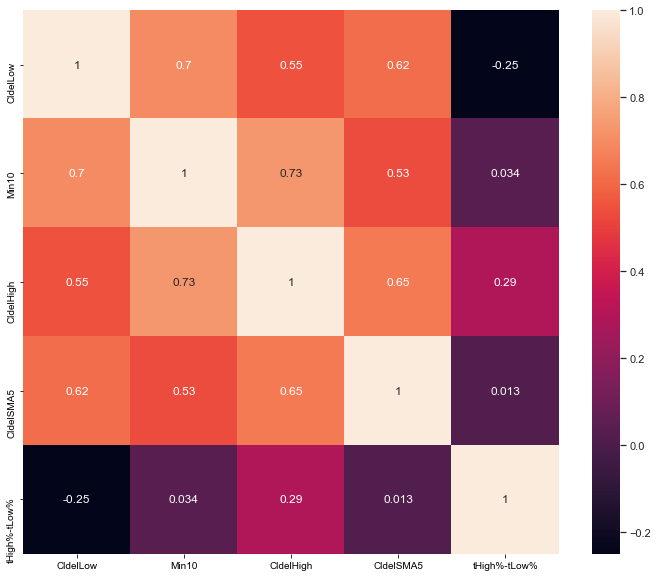

In [13]:
fig, ax  = plt.subplots(figsize = (12,10))
import seaborn as sns; sns.set()
ax = sns.heatmap(cor.corr(), annot=True)

In [324]:
writer = pd.ExcelWriter('result_11page_.xlsx', engine='openpyxl', mode="a")
result_(0.55,0.5).to_excel(writer, sheet_name = '0.55 все цикл(кол и срд)', startcol = 1)
writer.save()
writer.close()